# 4. With a suitable example demonstrate the perceptron learning law with its decision regions using python. Give the output in graphical form.


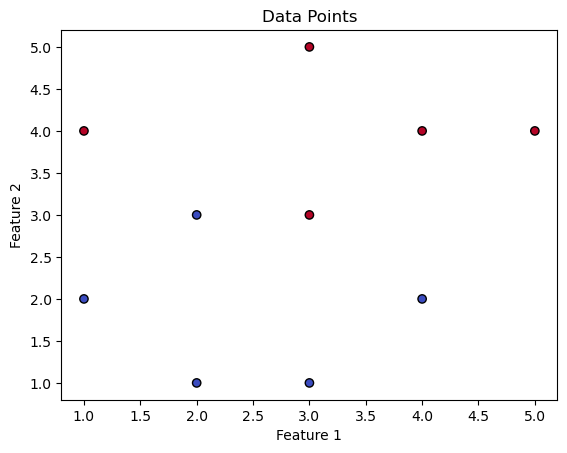

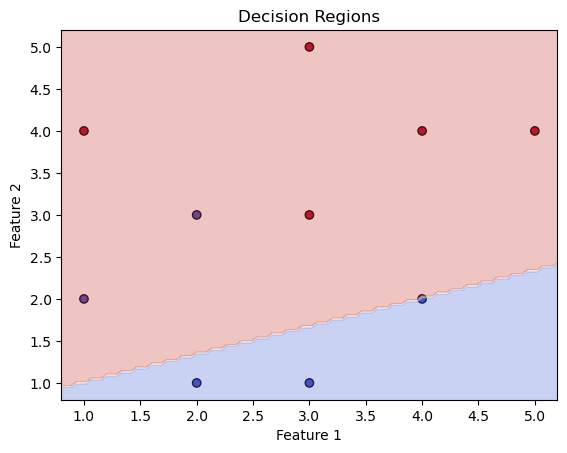

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define synthetic data
# Class 0
X_class0 = np.array([[1, 2], [2, 3], [3, 1], [4, 2], [2, 1]])
y_class0 = np.zeros(len(X_class0))

# Class 1
X_class1 = np.array([[1, 4], [3, 3], [4, 4], [3, 5], [5, 4]])
y_class1 = np.ones(len(X_class1))

# Combine data
X = np.vstack((X_class0, X_class1))
y = np.hstack((y_class0, y_class1))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Perceptron class
class Perceptron:
    def __init__(self, num_features):
        self.weights = np.zeros(num_features)
        self.bias = 0

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return 1 if weighted_sum >= 0 else 0

    def train(self, X, y, learning_rate=0.1, epochs=10):
        for i in range(epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                self.weights += learning_rate * (y[i] - prediction) * X[i]
                self.bias += learning_rate * (y[i] - prediction)

# Create perceptron instance
perceptron = Perceptron(num_features=2)

# Train perceptron
perceptron.train(X, y)

# Plot decision regions
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Decision Regions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.array([perceptron.predict([x, y]) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.show()
